In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
import torch
import torch.nn as nn

# 1. Derivatives Reivew

In the last notebook, we briefly covered gradients. Let's look at the idea again. First, recall that derivate of a single variable function $f(x)$ at a chosen input value $x$, if it exists, is the slope of the tangent line to the graph of the function at $x$. Consider the following function:<br><br>

<center>$f(x)= 3 x^{2}+8 x^{\frac{1}{2}} - \mathbf{e}^{x}$</center> <br>

If you survived your calculus I class, you may remember that the derivative of this function is: <br><br>

<center>$f'(x)= 6 x +4 x^{- \frac{1}{2}} - \mathbf{e}^{x}$</center> <br>

To evaluate the tangent at $x=4$ we plug 4 into the derivative:<br><br>

<center>$f'(4) = 6 (4) +4 (4)^{- \frac{1}{2}} - \mathbf{e}^{(4)} \approx -22.6$</center> <br>

Looking at this with python:

In [105]:
def f(x):
    return 3*x**2 + 8*x**.5 - np.exp(x)

def dev_f(x):
    return 6*x + 4*x**-.5 - np.exp(x)

def tan_f_at_4(x):
    return dev_f(4) * (x - 4) + f(4)

In [106]:
dev_f(4)

-28.598150033144236

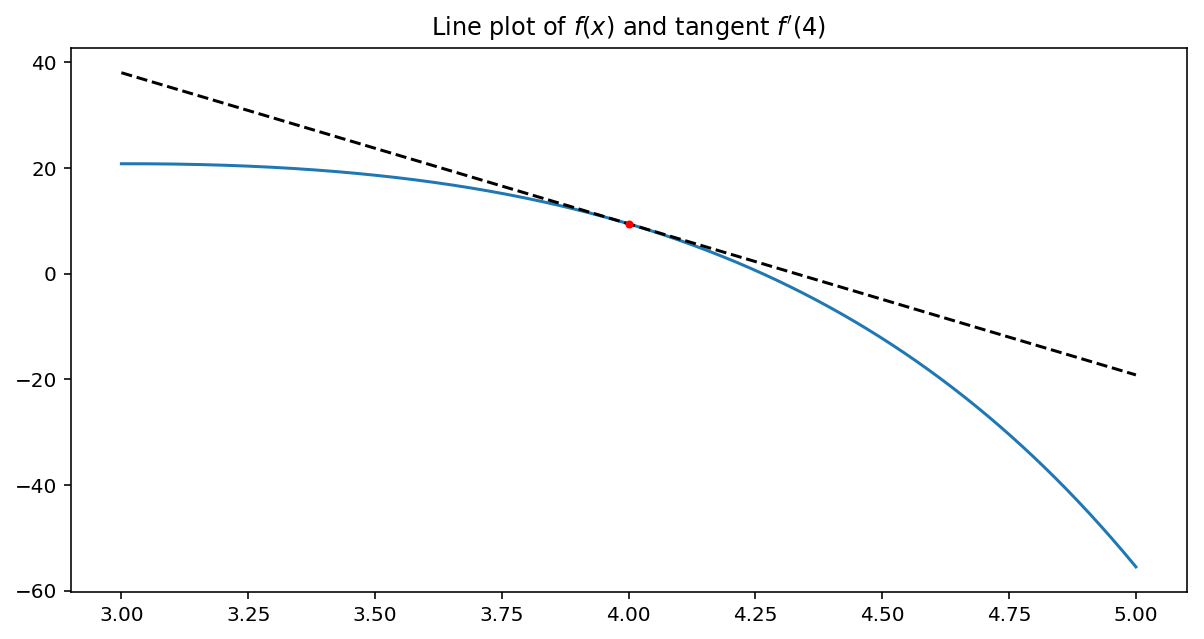

In [116]:
figure, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(3,5,1000)
y = f(x)

ax.set_title("Line plot of $f(x)$ and tangent $f'(4)$");
plt.plot(x,f(x));
plt.plot(x,tan_f_at_4(x), linestyle="--", color = "black");
plt.plot(4, f(4), marker='o', markersize=3, color="red");


# 2. Pytorch Gradient 

Pytorch allows all of this to work in the background.

In [118]:
x = torch.tensor(4.0, requires_grad = True) # Need to use floating number for tensors with gradients
y = 3*x**2 + 8*x**.5 - torch.exp(x) # Need to use pytorch exp
y.backward()
x.grad

tensor(-28.5982)

#### Partial Derivates

We can use a similar trick on partial derivates:

<center>$f(x, z)= x^{2}+ z^{3} \implies $</center> <br>

<center>$\frac{\partial}{\partial x}\left(z^{3}+x^{2}\right)=2 x \quad \frac{\partial}{\partial z}\left(z^{3}+x^{2}\right)=3 z^{2}$</center> <br>

If we evaluate at $x = 1$ and $z = 2$: <br>

<center>$\frac{\partial\left(f(x)=x^{2}\right)}{\partial x} \text { where } x=1 \implies 2\quad \quad \frac{\partial\left(f(z)=z^{3}\right)}{\partial z} \text { where } z=2 \implies 12$</center> <br>




In [119]:
x = torch.tensor(1.0, requires_grad = True) 
z = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + z ** 3
y.backward()
x.grad

tensor(2.)

In [120]:
z.grad

tensor(12.)

# 3. Blobs and with Neural Net

In [128]:
#For this example we are going to bring in a toy dataset
from sklearn import datasets

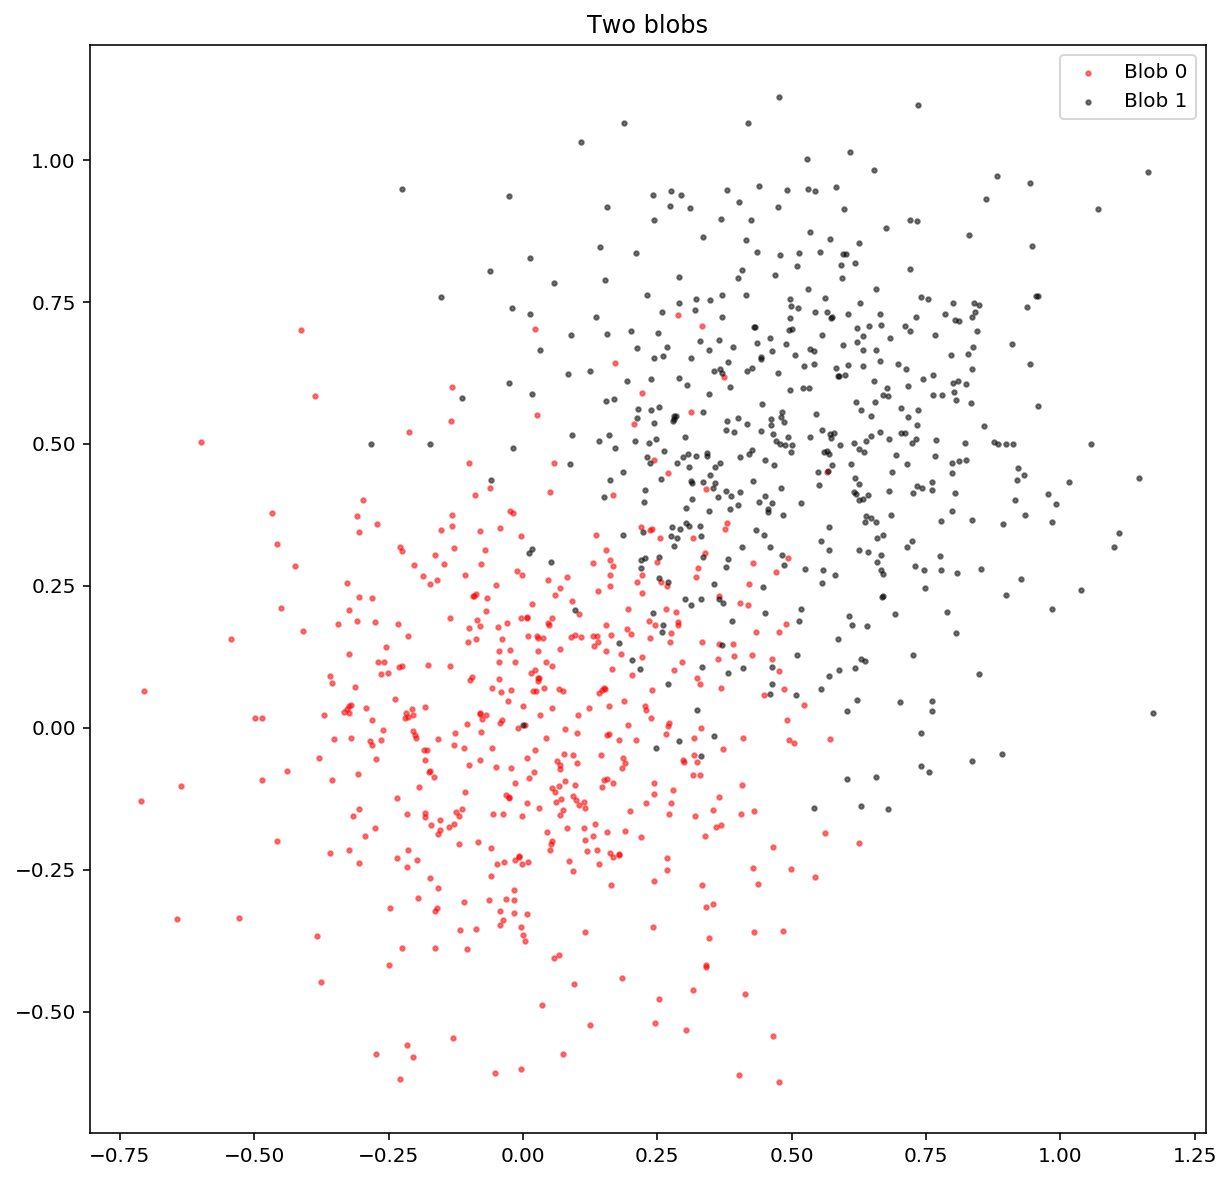

In [186]:
n_points = 1000
centers = [[0,0],[.5,.5]]
X, y = datasets.make_blobs(n_samples = n_points,
                           random_state = 88,
                           centers = centers,
                           cluster_std = .25,
                           n_features = 2 )

figure, ax = plt.subplots(figsize=(10, 10));


plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 5, color = "red", alpha = .5, label='Blob 0');
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 5, color = "black", alpha = .5, label='Blob 1');
plt.title("Two blobs");
plt.legend();

In [165]:
#These are numpy arrays so we need to transform them to tensors

x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [178]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [179]:
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0721,  0.5505]], requires_grad=True), Parameter containing:
tensor([-0.4275], requires_grad=True)]


In [188]:
[z,bias] = model.parameters()
z1, z2 = a.view(2)
def get_params():
    return(z1.item(), z2.item(), bias[0].item)

def plot_fit(title):
    plt.title = title
    z1, z2, bias = get_params()
    
    x2 = (z1  *x1 + bias)/-z2

In [136]:
y

array([1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0,

In [141]:
plt.scatter(X)

TypeError: scatter() missing 1 required positional argument: 'y'